# K Nearest Neighbor
---

**Introduction to K-Nearest Neighbors (KNN)**

K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm used for classification and regression tasks. It belongs to the family of instance-based, lazy learning algorithms, meaning it doesn't explicitly learn a model during training but rather stores instances of the training data and uses them during prediction.

**How KNN works:**
- Given a new data point, KNN identifies the K nearest neighbors to that point in the training data based on a distance metric (usually Euclidean distance).
- For classification tasks, the class labels of the majority of the nearest neighbors are used to predict the class of the new data point.
- For regression tasks, the average or weighted average of the nearest neighbors' target values is used to predict the target value of the new data point.

**Key Parameters:**
- **K:** The number of nearest neighbors to consider. Choosing an appropriate value of K is crucial as it can significantly impact the algorithm's performance. A smaller value of K leads to more flexible decision boundaries but can be sensitive to noise, while a larger value of K leads to smoother decision boundaries but may oversimplify the model.

**Advantages of KNN:**
- Simple and easy to understand.
- No training phase; predictions are made based on the entire training dataset.
- Can be used for both classification and regression tasks.
- Robust to noisy training data and works well with non-linear data.

**Disadvantages of KNN:**
- Computationally expensive during prediction, especially with large datasets.
- Requires a meaningful distance metric and appropriate scaling of features.
- Sensitivity to the choice of K and the presence of irrelevant features.
- Not suitable for high-dimensional data due to the curse of dimensionality.

---


KD Tree and Ball Tree are two data structures used to efficiently perform nearest neighbor searches in high-dimensional spaces. Here's an overview of each:

### KD Tree:
KD Tree, short for K-Dimensional Tree, is a binary tree structure designed for quickly finding the nearest neighbor of a given point in a k-dimensional space. Here's how it works:

1. **Construction**: KD Tree recursively partitions the feature space into smaller regions. At each level of the tree, it splits the data along one of the dimensions, alternating between dimensions at different levels. The splitting is done such that each node represents a region in the feature space.

2. **Search**: To find the nearest neighbor of a query point, KD Tree traverses the tree starting from the root node. At each node, it compares the query point with the splitting plane associated with that node. Based on the comparison, it decides which subtree to explore next. This process continues until it reaches a leaf node, which represents a region containing only a few data points. KD Tree then searches for the nearest neighbor among these data points.

3. **Balancing**: Efficient KD Tree construction requires careful balancing to ensure that the tree remains shallow and well-behaved. Imbalanced trees can lead to increased search times.

### Ball Tree:
Ball Tree is another tree-based data structure used for nearest neighbor searches, particularly in high-dimensional spaces. It has several advantages over KD Tree, especially in high-dimensional spaces where the curse of dimensionality becomes a concern. Here's how it differs from KD Tree:

1. **Construction**: Ball Tree recursively partitions the data into nested hyperspheres (balls) rather than hyperplanes as in KD Tree. It selects a center point and radius to define each ball, aiming to enclose a subset of the data points within each ball.

2. **Search**: Ball Tree uses the concept of covering balls to efficiently search for nearest neighbors. It maintains a set of balls that cover the entire dataset and recursively subdivides them until a certain stopping criterion is met. During search, Ball Tree computes the distance between the query point and the balls, skipping subtrees that cannot contain a closer neighbor than the best found so far.

3. **Performance**: Ball Tree tends to perform better than KD Tree in high-dimensional spaces because it can more effectively capture the local structure of the data. However, constructing a Ball Tree can be computationally expensive compared to KD Tree.

In summary, both KD Tree and Ball Tree are tree-based data structures used for nearest neighbor searches in high-dimensional spaces. While KD Tree partitions the data using hyperplanes, Ball Tree partitions the data using hyperspheres. The choice between the two depends on the dimensionality of the data and the specific requirements of the application.

---

Best Parameters: {'n_neighbors': 5}

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.94      0.88      0.91        17
           2       1.00      0.96      0.98        25

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



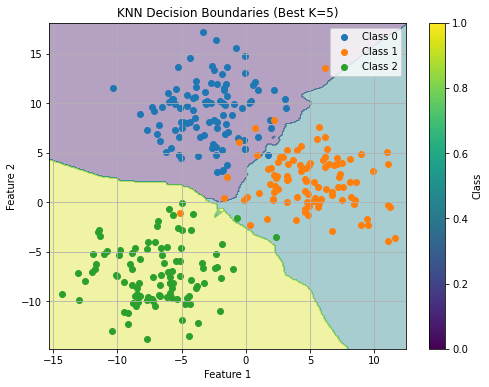

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Step 1: Generate scattered data points with 3 classes
X, y = make_blobs(n_samples=300, centers=3, cluster_std=3, random_state=42)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Step 4: Create the KNN classifier
knn = KNeighborsClassifier()

# Step 5: Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 6: Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Step 7: Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Step 8: Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Plot the decision boundaries of the best model
best_knn = grid_search.best_estimator_
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot each class with a different color
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

# Plot data points with different colors for each class
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}', cmap='viridis')

plt.title(f'KNN Decision Boundaries (Best K={best_knn.n_neighbors})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.legend()
plt.grid(True)
plt.show()


Here's a detailed explanation of each line of code:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
```

- **Line 1-5:** Import necessary libraries including NumPy for numerical computations, Matplotlib for plotting, and scikit-learn modules for dataset generation, model selection, KNN classification, and classification report.

```python
# Step 1: Generate scattered data points with 3 classes
X, y = make_blobs(n_samples=300, centers=3, cluster_std=3, random_state=42)
```

- **Step 1:** Generate scattered data points with 3 classes using the `make_blobs` function from scikit-learn. `n_samples` specifies the total number of data points, `centers` specifies the number of clusters, `cluster_std` specifies the standard deviation of the clusters, and `random_state` ensures reproducibility.

```python
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- **Step 2:** Split the generated data into training and testing sets using `train_test_split` function. `test_size=0.2` specifies that 20% of the data will be used for testing, and `random_state=42` ensures reproducibility.

```python
# Step 3: Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
```

- **Step 3:** Define a dictionary `param_grid` specifying the hyperparameters to search over using GridSearchCV. Here, we're specifying different values for the number of neighbors (`n_neighbors`).

```python
# Step 4: Create the KNN classifier
knn = KNeighborsClassifier()
```

- **Step 4:** Create an instance of the KNN classifier `KNeighborsClassifier`.

```python
# Step 5: Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
```

- **Step 5:** Perform hyperparameter tuning using GridSearchCV. We pass the KNN classifier (`knn`), parameter grid (`param_grid`), and specify 5-fold cross-validation (`cv=5`) to `GridSearchCV`.

```python
# Step 6: Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
```

- **Step 6:** Print the best parameters found by GridSearchCV.

```python
# Step 7: Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)
```

- **Step 7:** Make predictions on the test set using the best model obtained from GridSearchCV.

```python
# Step 8: Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
```

- **Step 8:** Evaluate the model by printing the classification report which includes precision, recall, F1-score, and support for each class.

```python
# Step 9: Plot the decision boundaries of the best model
best_knn = grid_search.best_estimator_
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
```

- **Step 9:** Plot the decision boundaries of the best model obtained from GridSearchCV. We define a meshgrid (`xx`, `yy`) to create a 2D grid of points spanning the entire feature space, and then use the `predict` method to predict the class labels for each point in the grid.

```python
# Plot each class with a different color
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

# Plot data points with different colors for each class
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}', cmap='viridis')

plt.title(f'KNN Decision Boundaries (Best K={best_knn.n_neighbors})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.legend()
plt.grid(True)
plt.show()
```

- Finally, we plot the decision boundaries of the best model and scatter the data points with different colors for each class. We use the `scatter` function to plot the data points, and `

---
## Mathematical intuition behind the K-Nearest Neighbors (KNN) algorithm:

### 1. Distance Metric:
KNN classifies a data point by comparing it with its neighbors in the feature space. The choice of distance metric is crucial, commonly used ones include:

- **Euclidean Distance**: The most commonly used distance metric. It measures the straight-line distance between two points in the feature space. Mathematically, for two points $( P = (p_1, p_2, ..., p_n) )$ and $( Q = (q_1, q_2, ..., q_n) )$, the Euclidean distance $( d(P, Q) )$ is calculated as:

$[ d(P, Q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} ]$

- **Manhattan Distance**: Also known as city-block distance or taxicab distance. It measures the distance between two points by summing the absolute differences of their coordinates. Mathematically, for two points \( P \) and \( Q \), the Manhattan distance \( d(P, Q) \) is calculated as:

$[ d(P, Q) = \sum_{i=1}^{n} |p_i - q_i| ]$

### 2. Finding Neighbors:
Once the distance metric is chosen, KNN identifies the $( k )$ nearest neighbors of a data point in the feature space based on the chosen distance metric. These neighbors are the $( k )$ data points with the shortest distances to the query point.

### 3. Majority Voting:
After identifying the $( k )$ nearest neighbors, KNN assigns a class label to the query point based on a majority voting scheme among its neighbors. The class label with the highest frequency among the $( k )$ neighbors is assigned to the query point.

### 4. Decision Boundary:
In classification problems, the decision boundary separates different classes in the feature space. In KNN, the decision boundary is nonlinear and can adapt to complex patterns in the data. It is determined by the distribution of the data points and the choice of $( k )$

### 5. Hyperparameter $( k )$:
The choice of $( k )$ is a critical hyperparameter in KNN. A small value of $( k )$ can lead to high variance and low bias, resulting in a flexible decision boundary that may overfit the training data. On the other hand, a large value of $( k )$ can lead to high bias and low variance, resulting in a smoother decision boundary that may underfit the data.

### 6. Curse of Dimensionality:
KNN performance can degrade in high-dimensional feature spaces due to the curse of dimensionality. As the number of dimensions increases, the volume of the feature space grows exponentially, leading to sparsity of data points. This can affect the effectiveness of distance-based methods like KNN.

In summary, KNN is an intuitive and simple algorithm for classification and regression tasks. It operates by finding the \( k \) nearest neighbors of a query point in the feature space and making predictions based on the majority vote of its neighbors. However, the choice of distance metric, \( k \), and handling of high-dimensional data are crucial considerations when applying KNN in practice.

---

## KNN Assignment 1

**Q1. What is the KNN algorithm?**
KNN, or K-Nearest Neighbors, is a simple and intuitive machine learning algorithm used for classification and regression tasks. It operates by finding the \( k \) nearest neighbors of a query point in the feature space and making predictions based on the majority vote (for classification) or average (for regression) of the labels of its neighbors.

**Q2. How do you choose the value of K in KNN?**
The choice of \( k \) in KNN is a crucial hyperparameter that can significantly impact the performance of the algorithm. It is typically chosen through cross-validation, where different values of \( k \) are evaluated on a validation set, and the one that yields the best performance is selected.

**Q3. What is the difference between KNN classifier and KNN regressor?**
KNN classifier predicts the class label of a query point based on the majority vote of its nearest neighbors, while KNN regressor predicts a continuous value by averaging the labels of its nearest neighbors.

**Q4. How do you measure the performance of KNN?**
The performance of KNN can be measured using various evaluation metrics depending on the task, such as accuracy, precision, recall, F1-score (for classification), and mean squared error (for regression).

**Q5. What is the curse of dimensionality in KNN?**
The curse of dimensionality refers to the phenomenon where the feature space becomes increasingly sparse as the number of dimensions increases. In KNN, this can lead to degraded performance because calculating distances between data points becomes less meaningful in high-dimensional spaces.

**Q6. How do you handle missing values in KNN?**
Missing values in KNN can be handled by imputing them with the mean, median, or mode of the feature values or using more advanced imputation techniques such as KNN-based imputation.

**Q7. Compare and contrast the performance of the KNN classifier and regressor. Which one is better for which type of problem?**
KNN classifier is suitable for classification problems where the target variable is categorical, while KNN regressor is suitable for regression problems where the target variable is continuous. The choice between the two depends on the nature of the problem and the type of output desired.

**Q8. What are the strengths and weaknesses of the KNN algorithm for classification and regression tasks, and how can these be addressed?**
Strengths of KNN include simplicity, flexibility, and effectiveness in capturing local patterns in the data. Weaknesses include sensitivity to noise and outliers, computational inefficiency with large datasets, and the need to choose an appropriate value of \( k \). These weaknesses can be addressed by preprocessing the data to handle outliers, reducing dimensionality, and optimizing \( k \) through cross-validation.

**Q9. What is the difference between Euclidean distance and Manhattan distance in KNN?**
Euclidean distance measures the straight-line distance between two points in the feature space, while Manhattan distance measures the distance by summing the absolute differences of their coordinates. Euclidean distance is sensitive to the magnitude of differences in all dimensions, while Manhattan distance is sensitive to differences in each dimension independently.

**Q10. What is the role of feature scaling in KNN?**
Feature scaling is important in KNN because it ensures that all features contribute equally to the distance calculation. Without feature scaling, features with larger scales may dominate the distance calculation, leading to biased results. Common methods of feature scaling include min-max scaling and standardization (z-score normalization).

---


## KNN Assignment 2

**Q1. What is the main difference between the Euclidean distance metric and the Manhattan distance metric in KNN? How might this difference affect the performance of a KNN classifier or regressor?**

The main difference between the Euclidean distance metric and the Manhattan distance metric lies in how they measure distance between two points in a multi-dimensional space. 

- Euclidean distance: It measures the straight-line distance between two points, which is the shortest path between them.
- Manhattan distance: Also known as taxicab or city block distance, it measures the distance between two points by summing the absolute differences of their coordinates along each dimension.

The difference in calculation can affect how the algorithm perceives distance between points. Euclidean distance tends to prioritize points that are closer in all dimensions, while Manhattan distance treats each dimension independently.

This difference in distance calculation might affect the performance of a KNN classifier or regressor depending on the dataset. In situations where the features have different scales or are not equally relevant, Manhattan distance may perform better as it gives equal weight to all dimensions. However, if the data has strong correlations and Euclidean distance is more appropriate for capturing the overall similarity between points, it might outperform Manhattan distance.

**Q2. How do you choose the optimal value of k for a KNN classifier or regressor? What techniques can be used to determine the optimal k value?**

Choosing the optimal value of \( k \) in KNN is crucial for its performance. One common approach is to use cross-validation, where different values of \( k \) are evaluated on a validation set, and the one that yields the best performance metric (such as accuracy for classification or mean squared error for regression) is selected.

Other techniques for determining the optimal \( k \) value include:
- Grid search: Trying a range of \( k \) values and evaluating each one using cross-validation to find the best-performing value.
- Elbow method: Plotting the performance metric (e.g., accuracy or error) against different \( k \) values and selecting the point where the performance starts to stabilize.

**Q3. How does the choice of distance metric affect the performance of a KNN classifier or regressor? In what situations might you choose one distance metric over the other?**

The choice of distance metric in KNN can significantly impact its performance. Euclidean distance is sensitive to differences in all dimensions and works well when the features have similar scales and are equally relevant. On the other hand, Manhattan distance treats each dimension independently and can be more robust to variations in scale or when dimensions are not equally important.

The choice between the two distance metrics depends on the characteristics of the data. For example:
- Euclidean distance might be preferred for datasets where the features are correlated and have similar scales.
- Manhattan distance might be preferred for datasets with features that are not correlated or have different scales.

**Q4. What are some common hyperparameters in KNN classifiers and regressors, and how do they affect the performance of the model? How might you go about tuning these hyperparameters to improve model performance?**

Common hyperparameters in KNN classifiers and regressors include:
- \( k \): The number of nearest neighbors to consider.
- Distance metric: The measure of distance used to calculate similarity between points.

These hyperparameters can affect the bias-variance trade-off of the model. For example, smaller values of \( k \) tend to increase the model's flexibility but may lead to overfitting, while larger values of \( k \) may increase bias but reduce variance.

To tune these hyperparameters and improve model performance, techniques such as grid search, random search, or Bayesian optimization can be used. These techniques involve trying different combinations of hyperparameters and evaluating the model's performance using cross-validation.

**Q5. How does the size of the training set affect the performance of a KNN classifier or regressor? What techniques can be used to optimize the size of the training set?**

The size of the training set can impact the performance of a KNN classifier or regressor. A larger training set can provide more representative samples of the underlying distribution, leading to better generalization. However, too large a training set may increase computational complexity and memory requirements.

To optimize the size of the training set, techniques such as:
- Cross-validation: Use techniques like k-fold cross-validation to evaluate the model's performance across different training set sizes and select the one that provides the best trade-off between bias and variance.
- Resampling methods: Techniques like bootstrapping or random sampling can be used to create smaller, more manageable training sets while preserving the underlying distribution of the data.

**Q6. What are some potential drawbacks of using KNN as a classifier or regressor? How might you overcome these drawbacks to improve the performance of the model?**

Some potential drawbacks of using KNN include:
- Sensitivity to outliers: Outliers can disproportionately influence the decision boundaries in KNN.
- High computational cost: KNN requires storing and comparing distances with all training instances, which can be computationally expensive for large datasets.
- Need for feature scaling: Features with larger scales can dominate the distance calculation, leading to biased results.

To overcome these drawbacks, techniques such as:
- Outlier detection and removal: Identifying and removing outliers from the dataset can help improve the robustness of the model.
- Dimensionality reduction: Techniques like principal component analysis (PCA) or feature selection can help reduce the dimensionality of the feature space, making KNN more computationally efficient.
- Feature scaling: Scaling features to have similar ranges can help prevent features with larger scales from dominating the distance calculation. Common scaling techniques include min-max scaling or standardization.

---

## KNN Assignment 3

### Q1. Implement KNN classifier on load_iris dataset:



In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


### Q2. Implement KNN regressor on load_diabetes dataset:




In [15]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn = KNeighborsRegressor()

# Fit the regressor to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3019.075505617978


### Q3. Find optimal value of K for KNN classifier using cross-validation on load_iris dataset:



In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best value of k
print("Best value of K:", grid_search.best_params_['n_neighbors'])


Best value of K: 6


### Q4. Implement KNN regressor with feature scaling on load_diabetes dataset:




In [14]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor
knn = KNeighborsRegressor()

# Fit the regressor to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3019.075505617978


### Q5. Implement KNN classifier with weighted voting on load_iris dataset:



In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with weighted voting
knn = KNeighborsClassifier(weights='distance')

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


### Q6. Function to standardize features before applying KNN classifier:



In [11]:
from sklearn.preprocessing import StandardScaler

def standardize_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled


### Q7. Function to calculate Euclidean distance between two points:



In [12]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))



### Q8. Function to calculate Manhattan distance between two points:



In [13]:
def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))
